## Reed-Frost model  and stochastic discrete time epidemics

The Reed-Frost model is one of the first models of epidemics that serves as a foundation for many more complicated models of how an outbreak evolves over time.

The Reed-Frost (RF model assumes individuals can belong to one of three different states: Susceptible (S), Infectious (I), or Recovered and immune (R).
Individuals can move between these three different states over a series of discrete time steps.
Susceptible individuals move to the infectious group with a specific probability and all those who are infectious within one time step become recovered (and immune). 

The best part of the Reed-Frost model is that it involves almost everything we've learned in PHDS-I up to this point. 

## Probability of infection

The RF model assumes that those who are infectious---those who belong to the I state---infect individuals in the susceptible state with the same probability $p$. 
During each time step, the RF model also assumes every infectious individual comes into contact with every susceptible individual---the more infectious individuals the harder it is to stay susceptible. 

The way the RF model defines this is as follows. 
Suppose there is a single infectious individual.
The probability a susceptible individual becomes infected is then

\begin{align}
    p(\text{Susceptible becomes infected after one exposure}) = p
\end{align}

and the probability they remain susceptible is

\begin{align}
    p(\text{Remained susceptible after one exposure}) = (1-p)
\end{align}

Now suppose there are two infected individuals. 
A susceptible individual remain susceptible is if both the first and the second infectious individual do not infect them.

\begin{align}
    p(\text{Remained susceptible after two exposures}) = (1-p)^{2}
\end{align}

The RF model assumes that the probabilities that each individual infects a susceptible are **independent**.
By definition

\begin{align}
    p(\text{second person infects susceptible} | \text{first person infects susceptible}) &= p \\
        & = p(\text{second person infects susceptible}) 
\end{align}

Then the probability at least one of the infected individuals did successfully infect this susceptible individual is if the susceptible individual did not remain susceptible or 

\begin{align}
    p(\text{At least one infected a susceptible}) = 1 - (1-p)^{2}
\end{align}

Now suppose that there are $I$ infected individuals. 
Then the probability that at least one of the $I$ infected individuals infects a susceptible is 

\begin{align}
    p(\text{At least one of the I infected infects a susceptible}) = 1 - (1-p)^{I}
\end{align}

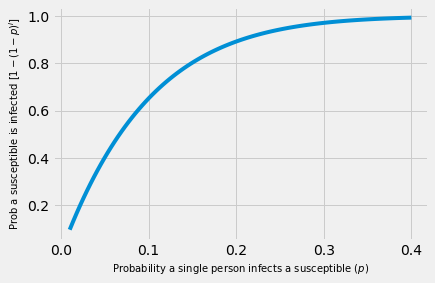

In [27]:
def susceptibleIsInfected(NumberInfected, probOfInfection):
    return 1 - (1- probOfInfection)**NumberInfected

probOfInfection = np.linspace(0.01,0.40,100)
NumberInfected = 10

probs_SusceptibleIsInfected = []
for prob in probOfInfection:
    probSusceptibleIsInfected = susceptibleIsInfected(NumberInfected, prob)
    probs_SusceptibleIsInfected.append( probSusceptibleIsInfected )

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
fig,ax = plt.subplots()

ax.plot( probOfInfection, probs_SusceptibleIsInfected )

ax.set_xlabel(r"Probability a single person infects a susceptible ($p$)",fontsize=10)
ax.set_ylabel(r"Prob a susceptible is infected $[1 - (1-p)^{I}]$",fontsize=10)

plt.show()

As the probability a single person infects a susceptible increases, the probability a susceptible is infected by one of 10 infected individuals increases. The rate of increase is more dramatic between $p$s of 0.01 and 0.2 and after the rate of increases of the probability tapers off---getting very close to 1. 


### TL;DR Successive vs simultaneous contact and infection
An interesting consequence of the above is that the probability a single infected individual infects a susceptible over $I$ time steps is the same as the probability $I$ individuals infect a susceptible in a single time step.  

## Chain binomial models

### Formally define the Reed-Frost model

The Reed-Frost model is the following stochastic process:

\begin{align}
    I_{t+1} &= \text{Bin}\left( S_{t}, 1 - (1-p)^{I_{t}} \right)\\
    S_{t+1} &= S_{t} - I_{t+1}\\
    R_{t+1} &= R_{t} + I_{t}\\
\end{align}
The number of infected individuals at the next time step ($t+1$) depends on the number of susceptible and infected individuals at time $t$ and on the probability a single infected individual infects a susceptible $(p)$.
The number of infected individuals at time $t+1$ is a sample from a Binomial distribution and is the only random component in the model. 
The number of susceptible individuals is decremented by the number of infected individuals and all infected individuals at time $t$ recover within one time step.

### Simulate and intuition

Lets gain some intuition by coding up this model and simulating some time steps. 

#### Define a function that computes the $I_{t}$

In [28]:
def IAtTPlus1(S,I,p):
    # we can use our previous function
    probOfInfectingASusceptible = susceptibleIsInfected(NumberInfected=I,probOfInfection=p) 
    # return a single sample from a binomial dist
    return np.random.binomial(S,probOfInfectingASusceptible)

#### Define a function for S

In [29]:
def SAtTPlus1(S,IatTPlus1):
    return S - IatTPlus1

#### Define a function for R

In [30]:
def RAtTPlus1(R,I):
    return R+I

#### The simulation

In [62]:
numberOfTimeSteps = 20
p = 0.0235

Is = [1]
Ss = [100]
Rs = [0]

for t in np.arange(0,numberOfTimeSteps):
    # at previous time step
    St = Ss[t]
    It = Is[t]
    Rt = Rs[t]
    
    #at the next time step
    Itp1 = IAtTPlus1(St,It,p)
    Stp1 = SAtTPlus1(St,Itp1)
    Rtp1 = RAtTPlus1(Rt,It)
    
    # collect data
    Is.append(Itp1)
    Ss.append(Stp1)
    Rs.append(Rtp1)

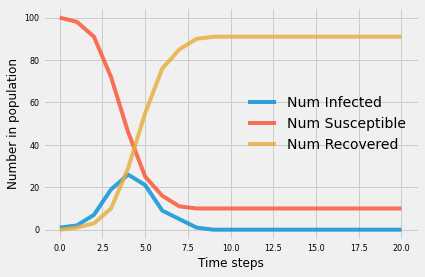

In [64]:
fig,ax = plt.subplots()

ax.plot(Is, label = "Num Infected",alpha=0.80)
ax.plot(Ss, label = "Num Susceptible",alpha=0.80)
ax.plot(Rs, label = "Num Recovered",alpha=0.80)

ax.legend(frameon=False)

ax.set_xlabel("Time steps", fontsize=12)
ax.set_ylabel("Number in population", fontsize=12)

ax.tick_params(which="both",labelsize=8.)


### Many simulations to examine the trajectory of I



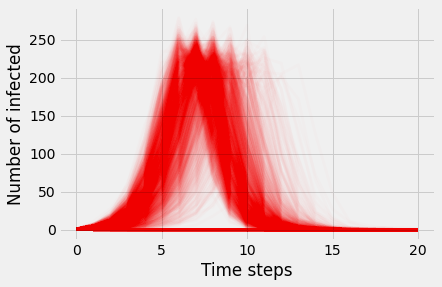

In [70]:
# Wrap the Reed-Frost simualtion inside a function
def simulateRFModel(numberOfTimeSteps,p,Is=[1],Ss=[],Rs=[]):
    for t in np.arange(0,numberOfTimeSteps):
        # at previous time step
        St = Ss[t]
        It = Is[t]
        Rt = Rs[t]

        #at the next time step
        Itp1 = IAtTPlus1(St,It,p)
        Stp1 = SAtTPlus1(St,Itp1)
        Rtp1 = RAtTPlus1(Rt,It)

        # collect data
        Is.append(Itp1)
        Ss.append(Stp1)
        Rs.append(Rtp1)
    # and return a dictionary that contains all three states and their values over time. 
    return {"Is":Is, "Ss":Ss,"Rs":Rs} 

fig,ax = plt.subplots()

numberOfSimulations = 2*10**3
for n in range(numberOfSimulations):
    fromState2List = simulateRFModel(20,0.0025,Is=[1],Ss=[1000],Rs=[0])

    Is = fromState2List["Is"]
    ax.plot(Is,lw=3,alpha=0.01,color="red")
    
ax.set_xlabel("Time steps")
ax.set_ylabel("Number of infected")

plt.show()

### R naught and criticality

The expected number of infected individuals a single infected individual in a completely susceptible population is given the name $\text{R}_{0}$, pronounced "Are Naught".
The value $\text{R}_{0}$ can be used to determine whether or not an outbreak---or sudden uptick in infected individuals---occurs. 

For the Reed-Frost model we can determine a formula for $\text{R}_{0}$.
If there are $S$ susceptible individuals and a single infected individual with probability $p$ of infecting any susceptible individual then the number of infected follows a binomial distribution

\begin{align}
    I_{t+1} = \text{Bin}\left( S, p \right)
\end{align}

And so the expected number of infection at the next time step, the expected number of secondary infections is 

\begin{align}
    \text{R}_{0} = Sp
\end{align}

#### Final fraction
We can mathematically define whether an epidemic has occurred if the final fraction of infected individuals $(F)$ in a population is positive. 
If the fraction of infected individuals is zero then no epidemic has happened. 

If the fraction of those who are infected at the end of the outbreak is $F = \dfrac{I_{\infty}}{S}$ then the fraction who are not infected is $1-F$. 
The probability a susceptible person "escapes" and is not infected by any of the final fraction is 

\begin{align}
    p(\text{Not infected}) = (1-p)^{ I_{\infty} }
\end{align}

but we can rewrite $p$ using R$_{0}$ and $S$

\begin{align}
    p(\text{Not infected}) = \left(1-\dfrac{ \text{R}_{0}}{S} \right)^{ I_{\infty} }
\end{align}

and we can rewrite I_{\infty} using $F$ and $S$. 

\begin{align}
   p(\text{Not infected}) =  \left( 1-\dfrac{\text{R}_{0}}{S} \right)^{ FS }
\end{align}

(Warning, math magic ahead).
In an infinity large susceptible population (ie as S grows towards infinity) the right hand side of this equation can be approximated by an exponential. 

\begin{align}
   1- F  &= \text{proportion not infected} \approx p(\text{Not infected}) \approx  \exp \left( -\text{R}_{0}F \right)\\
   1 - F &= \exp \left( -\text{R}_{0}F \right)
\end{align}

Lets put all the $F$s on one side. 

\begin{align}
   1 - F &= \exp \left( -\text{R}_{0}F \right) \\
   \log (1-F) = - \text{R}_{0}F\\
   -\dfrac{\log (1-F)}{F} = \text{R}_{0}
\end{align}

Now for each value choice of R$_{0}$ we can find an $F$ that satisfies the above equation.

(-0.05, 1.0)

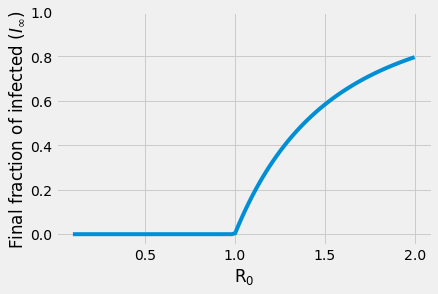

In [107]:
def finalFractionInfected(R0):
    from scipy.optimize import root_scalar
    final = lambda f: -np.log(1-f)/f - R0
    finalFrac = max(0,root_scalar(final, x0=.25,x1=0.75).root)
    return finalFrac

R0s = np.linspace(0.1,2,100)


FFs = []
for R0 in R0s:
    FF = finalFractionInfected(R0)
    FFs.append(FF)
    
fig,ax = plt.subplots()
ax.plot(R0s,FFs)

ax.set_xlabel(r"R$_{0}$")
ax.set_ylabel(r"Final fraction of infected ($I_{\infty}$)")

ax.set_ylim(-0.05,1)
plt.show()

At values of R$_{0}$ greater than 1 there is a positive fraction of infected individuals. 